In [26]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [27]:
from monty.serialization import loadfn, dumpfn

In [36]:
complete_energies = loadfn('../data/competing_phase_calcs2.json')

Defect formation energy = energy of defect supercell *min energy site* + Al atoms chem potential - non defect supercell - Cr atom chem potential

In [43]:
for key in complete_energies.keys():
    complete_energies[key]['defect formation energy'] = {}
    defect_supercell_e = complete_energies[key]['minimum energy site']['energy']
    supercell_e = complete_energies[key]['supercell']['energy'] # pristine supercell
    formation_energy = {}
    for key1 in complete_energies[key]['competing phases']['chemical potentials']['limits'].keys():
        defect_energy = defect_supercell_e + complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Al'] - supercell_e - complete_energies[key]['competing phases']['chemical potentials']['limits'][key1]['Cr']
        formation_energy[key1] = defect_energy
    complete_energies[key]['defect formation energy'] = formation_energy

In [38]:
dumpfn(complete_energies, '../data/calculated_defect_formation_energies2.json')

In [39]:
complete_energies = loadfn('../data/calculated_defect_formation_energies2.json')

In [44]:
for key1, val1 in complete_energies.items():
    print(complete_energies[key1]['formula'])
    for key, val in complete_energies[key1]['competing phases']['chemical potentials']['limits_wrt_el_refs'].items():
        for keys in val.keys():
            if val[keys] == 0.0:
                print(f"{keys} rich : {key} : {complete_energies[key1]['defect formation energy'][key]}")

Al(PO3)3
P rich : Al(PO3)3-AlPO4-P-CrP4 : 2.278201770353002
P rich : Al(PO3)3-P2O5-P-CrP4 : 0.22690177035291903
O rich : Al(PO3)3-AlPO4-O2-Cr(PO3)3 : 0.08707177035278946
O rich : Al(PO3)3-P2O5-O2-Cr(PO3)3 : 0.08715177035282906
LiAlO2
Al rich : LiAlO2-LiAl-Al-Al45Cr7 : 5.6777931814854625
Al rich : LiAl5O8-LiAlO2-Al-Al45Cr7 : 5.6777931814854625
AlClO
Cl rich : AlClO-Cl2-Al2O3-CrCl3 : 2.838328351163181
Cl rich : AlClO-AlCl3-Cl2-CrCl3 : 2.945378351163196
Al rich : AlClO-Al-Al2O3-Al45Cr7 : 5.304498351163197
Al rich : AlClO-AlCl3-Al-Al45Cr7 : 5.304498351163197
SmAlO3
O rich : SmAlO3-Sm3Al5O12-O2-SmCrO4 : 0.7788816141027901
O rich : SmAlO3-Sm4Al2O9-O2-SmCrO4 : 0.7788816141027652
AlWO4
W rich : AlWO4-W-Al2O3-CrWO4 : -0.5814105758389321
KAlP2O7
P rich : KAlP2O7-Al(PO3)3-AlPO4-P-CrP4 : 2.1416966433999907
P rich : KAlP2O7-Al(PO3)3-P-KPO3-CrP4 : 1.8834966434000027
O rich : KAlP2O7-Al(PO3)3-AlPO4-O2-KCrP2O7 : 0.0749466434000059
O rich : KAlP2O7-Al(PO3)3-O2-KPO3-KCrP2O7 : 0.07499664340001111
O rich 

In [45]:
# Plot of minimum formation energies for each material
#Only takes positive formation energies
mfe = []
compounds = []
for key, val in complete_energies.items():
    positive_energies = {k: v for k, v in val['defect formation energy'].items() if v > 0}
    if positive_energies:
        compounds.append(complete_energies[key]['formula'])
        min_key = min(positive_energies, key=positive_energies.get)
        min_value = positive_energies[min_key]
        mfe.append(val['defect formation energy'][min_key])

In [46]:
mfe = []
compounds = []
for key, val in complete_energies.items():
    compounds.append(complete_energies[key]['formula'])
    min_key = min(val['defect formation energy'], key=val['defect formation energy'].get)
    min_value = complete_energies[key]['defect formation energy'][min_key]
    mfe.append(val['defect formation energy'][min_key])

In [47]:
import numpy as np
import matplotlib.pyplot as plt

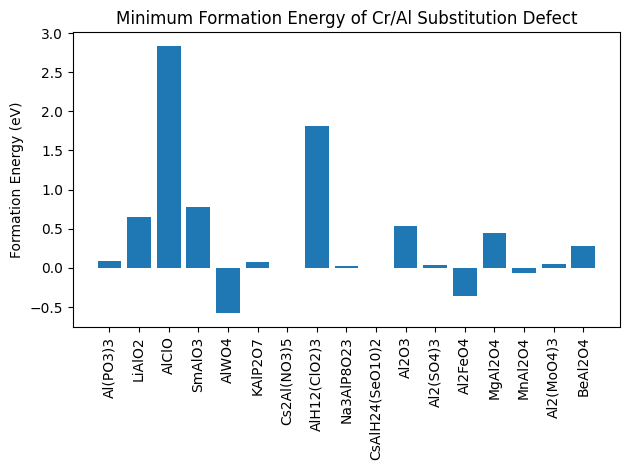

In [48]:
fig, ax = plt.subplots()
bars = ax.bar(compounds, mfe)  # Assuming you have these lists already

# Add labels on top of each bar
ax.set_title("Minimum Formation Energy of Cr/Al Substitution Defect")
ax.set_ylabel("Formation Energy (eV)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../figures/min_defect_formation_energies.png", dpi=300, bbox_inches='tight')
plt.show()

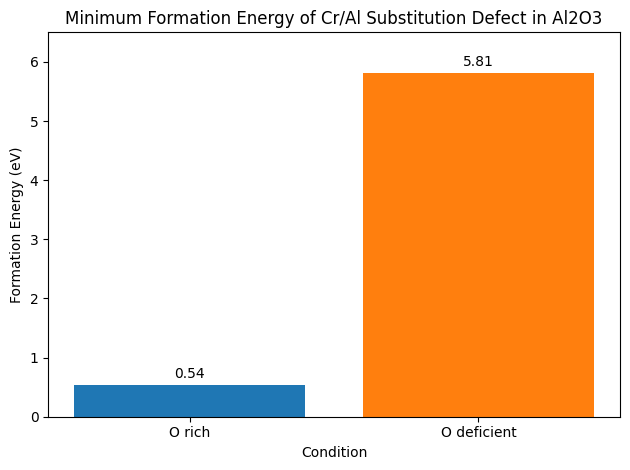

In [42]:
import matplotlib.pyplot as plt

# Data
conditions = ['O rich', 'O deficient']
formation_energies = [0.5400993289464999, 5.805219328946514]

# Set up the plot
fig, ax = plt.subplots()

# Plot bar chart
bars = ax.bar(conditions, formation_energies, color=['tab:blue', 'tab:orange'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
# Formatting
ax.set_title("Minimum Formation Energy of Cr/Al Substitution Defect in Al2O3")
ax.set_ylabel("Formation Energy (eV)")
ax.set_xlabel("Condition")

plt.tight_layout()
plt.ylim(0,6.5)
# Save and show
plt.savefig("../figures/Al2O3_defect_formation_energies.png", dpi=300, bbox_inches='tight')
plt.show()
